# Questão 1

## Importação das bibliotecas necessárias.

In [37]:
import networkx as nx
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.patches as mpatches
df = pd.read_csv('D:\Trabalho 1 - Redes Complexas\paulista_2013_2023 (1).csv', sep = ';')

<>:7: SyntaxWarning: invalid escape sequence '\T'
<>:7: SyntaxWarning: invalid escape sequence '\T'
C:\Users\Davi\AppData\Local\Temp\ipykernel_10992\3383886878.py:7: SyntaxWarning: invalid escape sequence '\T'
  df = pd.read_csv('D:\Trabalho 1 - Redes Complexas\paulista_2013_2023 (1).csv', sep = ';')


## Separando entre jogos de ida e jogos de volta

In [38]:
jogos_n = [] # Valores Nominais: Ex: [Santos, Linense]
jogos_b = [] # Valores binários(1 para jogo de ida e 0 caso contrário)
for index in df.index:
    reverso = [df['away'].loc[index], df['home'].loc[index]]
    if reverso not in jogos_n:
        jogos_n.append(reverso[::-1])
        jogos_b.append(1)
    else: jogos_b.append(0)


### Coluna ida = 1 significa que o jogo foi de ida e ida = 0 caso contrário.

In [39]:
df['ida'] = jogos_b
df

,home,away,weight1,weight2,ida
0,Santos,Linense,7.0,1.0,1
1,Santo Andre,Ituano,14.0,17.0,1
2,Sao Bento,Corinthians,4.0,6.0,1
3,Novorizontino,Sao Bernardo,2.0,0.0,1
4,Mirassol,RB Brasil,6.0,6.0,1
...,...,...,...,...,...
853,Santos,Uniao Barbarense,0.0,0.0,0
854,Paulista,Sao Caetano,0.0,0.0,0
855,Uniao Barbarense,Guarani,1.0,0.0,0
856,Sao Bento,Oeste,1.0,3.0,0


## Criação das 4 redes a serem analisadas:  
*   G1 = jogos de ida e peso 1;
*   G2 = jogos de volta e peso 1;
*   G3 = jogos de ida e peso 2;
*   G4 = jogos de volta e peso 2.



In [40]:
# Rede utilizando o peso 1(Jogos de ida)
G1 = nx.DiGraph()

# Rede utilizando o peso 1(Jogos de volta)
G2 = nx.DiGraph()

# Rede utilizando o peso 2(Jogos de ida)
G3 = nx.DiGraph()

# Rede utilizando o peso 2(Jogos de volta)
G4 = nx.DiGraph()

# Adição das arestas
for i in range(len(df)):
  v1 = df['home'][i]
  v2 = df['away'][i]
  if df['ida'][i] == 1:
    G1.add_edge(v1, v2, weight = df['weight1'][i])
    G3.add_edge(v1, v2, weight = df['weight2'][i])
  else:
    G2.add_edge(v1, v2, weight = df['weight1'][i])
    G4.add_edge(v1, v2, weight = df['weight2'][i])


## Visualização das Redes

c:\Users\Davi\AppData\Local\Programs\Python\Python312\Lib\site-packages\networkx\drawing\layout.py:725: RuntimeWarning: divide by zero encountered in divide
  costargs = (np, 1 / (dist_mtx + np.eye(dist_mtx.shape[0]) * 1e-3), meanwt, dim)
c:\Users\Davi\AppData\Local\Programs\Python\Python312\Lib\site-packages\networkx\drawing\nx_pylab.py:450: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


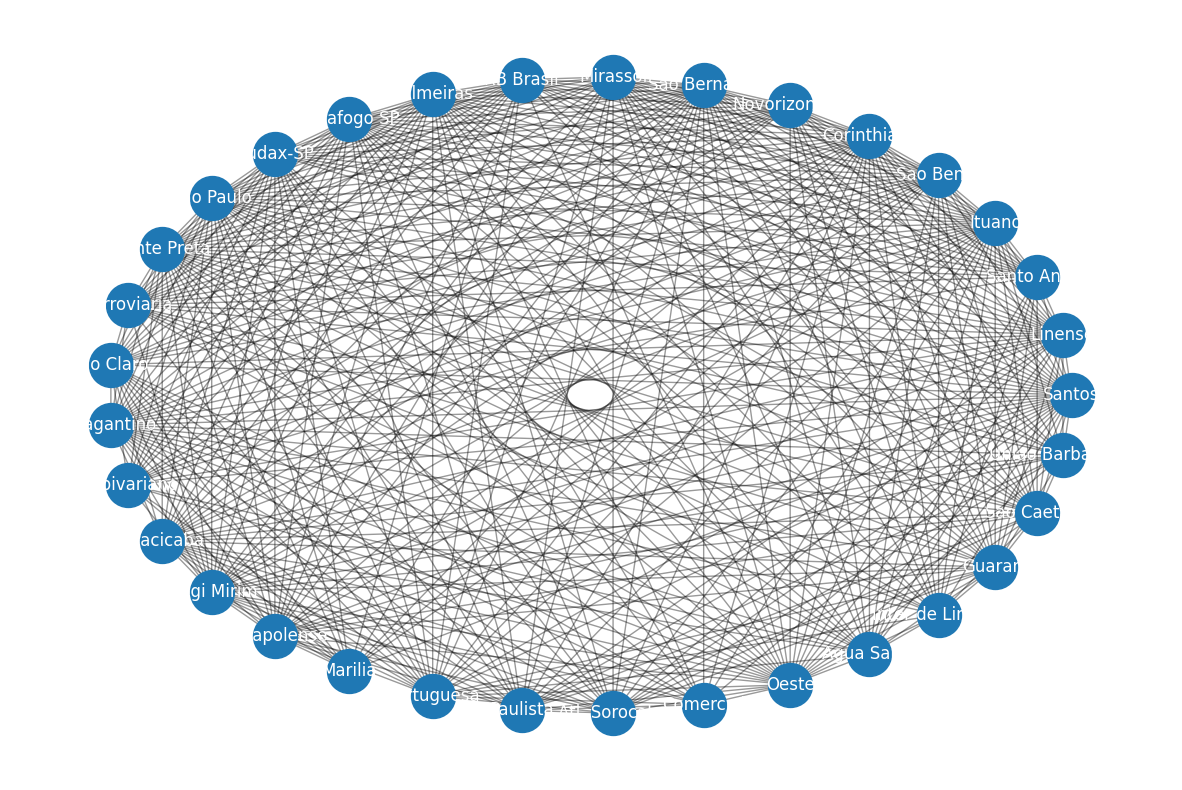

In [41]:
fig, ax = plt.subplots(1,1,figsize=(15,10))

# network
G = G1

# layout position
pos = nx.kamada_kawai_layout(G)

# draw edges
nx.draw_networkx_edges(G,
                       pos=pos,
                       alpha=0.4,
                       ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(G,
                               node_size=1000,
                               pos=pos,
                               cmap=plt.cm.jet,
                               ax=ax)

# draw labels
nx.draw_networkx_labels(G,
                        pos=pos,
                        font_color='white',
                        ax=ax)

plt.axis("off")
plt.show()

## Gráfico das Redes

In [42]:
G1.in_degree('Santos')

14

In [43]:
list(G1.nodes())

['Santos',
 'Linense',
 'Santo Andre',
 'Ituano',
 'Sao Bento',
 'Corinthians',
 'Novorizontino',
 'Sao Bernardo',
 'Mirassol',
 'RB Brasil',
 'Palmeiras',
 'Botafogo SP',
 'Audax-SP',
 'Sao Paulo',
 'Ponte Preta',
 'Ferroviaria',
 'Rio Claro',
 'Bragantino',
 'Capivariano',
 'Piracicaba',
 'Mogi Mirim',
 'Penapolense',
 'Marilia',
 'Portuguesa',
 'Paulista',
 'Atl. Sorocaba',
 'Comercial',
 'Oeste',
 'Agua Santa',
 'Inter de Limeira',
 'Guarani',
 'Sao Caetano',
 'Uniao Barbarense']

In [44]:
df[df['away'] == 'Sao Paulo']['weight1'].sum()

289.0

In [45]:
fixo = 'Palmeiras'
soma = 0
for i in range(len(list(G1.nodes())) - 1):
  comp = list(G1.nodes())[i]
  try:
    soma = soma + G1.get_edge_data(fixo, comp)['weight']
  except TypeError:
    continue
soma

48.0

# Questão 2

## Densidade

In [46]:
print(f"A densidade de G1 é igual = {nx.density(G1)}")
print(f"A densidade de G2 é igual = {nx.density(G2)}")
print(f"A densidade de G3 é igual = {nx.density(G3)}")
print(f"A densidade de G4 é igual = {nx.density(G4)}")

A densidade de G1 é igual = 0.40625
A densidade de G2 é igual = 0.40625
A densidade de G3 é igual = 0.40625
A densidade de G4 é igual = 0.40625


## Comprimento médio dos caminhos

In [47]:
print(f"O comprimento médio dos caminhos de G1 é {nx.average_shortest_path_length(G1)}")
print(f"O comprimento médio dos caminhos de G2 é {nx.average_shortest_path_length(G2)}")
print(f"O comprimento médio dos caminhos de G3 é {nx.average_shortest_path_length(G3)}")
print(f"O comprimento médio dos caminhos de G4 é {nx.average_shortest_path_length(G4)}")

O comprimento médio dos caminhos de G1 é 1.5946969696969697
O comprimento médio dos caminhos de G2 é 1.5946969696969697
O comprimento médio dos caminhos de G3 é 1.5946969696969697
O comprimento médio dos caminhos de G4 é 1.5946969696969697


## Coesão e Agrupamento

In [48]:
# calculando os coeficientes de agrupamento total
print(f"Coeficiente de agrupamento total de G1 é igual a {nx.transitivity(G1)}")
print(f"Coeficiente de agrupamento total de G2 é igual a {nx.transitivity(G2)}")
print(f"Coeficiente de agrupamento total de G3 é igual a {nx.transitivity(G3)}")
print(f"Coeficiente de agrupamento total de G4 é igual a {nx.transitivity(G4)}")

Coeficiente de agrupamento total de G1 é igual a 0.4240875912408759
Coeficiente de agrupamento total de G2 é igual a 0.43342036553524804
Coeficiente de agrupamento total de G3 é igual a 0.4240875912408759
Coeficiente de agrupamento total de G4 é igual a 0.43342036553524804


## Reciprocidade

In [49]:
print(f"Reciprocidade de G1 = {nx.reciprocity(G1)}")
print(f"Reciprocidade de G2 = {nx.reciprocity(G2)}")
print(f"Reciprocidade de G3 = {nx.reciprocity(G3)}")
print(f"Reciprocidade de G4 = {nx.reciprocity(G4)}")

Reciprocidade de G1 = 0.0
Reciprocidade de G2 = 0.0
Reciprocidade de G3 = 0.0
Reciprocidade de G4 = 0.0


## Distribuição de Graus

In [50]:
print(f"Distribuição de Graus de G1 = {nx.degree_histogram(G1)}")
print(f"Distribuição de Graus de G2 = {nx.degree_histogram(G2)}")
print(f"Distribuição de Graus de G3 = {nx.degree_histogram(G3)}")
print(f"Distribuição de Graus de G4 = {nx.degree_histogram(G4)}")

Distribuição de Graus de G1 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 0, 1, 3, 0, 1, 5, 1, 3, 3, 1, 0, 5, 5]
Distribuição de Graus de G2 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 0, 1, 3, 0, 1, 5, 1, 3, 3, 1, 0, 5, 5]
Distribuição de Graus de G3 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 0, 1, 3, 0, 1, 5, 1, 3, 3, 1, 0, 5, 5]
Distribuição de Graus de G4 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 0, 1, 3, 0, 1, 5, 1, 3, 3, 1, 0, 5, 5]


# Questão 3

## Excentricidade

In [51]:
# calculo da excentricidade do grafo
def exct(grafo):
  ec = nx.eccentricity(grafo)
  for chave, valor in ec.items():
      print(f"Excentricidade de {chave} = {valor}")
print(f"=========================== Excentricidades de G1 ====================================")
print(exct(G1))
print(f"=========================== Excentricidades de G2 ====================================")
print(exct(G2))
print(f"=========================== Excentricidades de G3 ====================================")
print(exct(G3))
print(f"=========================== Excentricidades de G4 ====================================")
print(exct(G4))

=========================== Excentricidades de G1 ====================================
Excentricidade de Santos = 2
Excentricidade de Linense = 2
Excentricidade de Santo Andre = 2
Excentricidade de Ituano = 2
Excentricidade de Sao Bento = 2
Excentricidade de Corinthians = 2
Excentricidade de Novorizontino = 2
Excentricidade de Sao Bernardo = 2
Excentricidade de Mirassol = 2
Excentricidade de RB Brasil = 2
Excentricidade de Palmeiras = 2
Excentricidade de Botafogo SP = 2
Excentricidade de Audax-SP = 2
Excentricidade de Sao Paulo = 2
Excentricidade de Ponte Preta = 2
Excentricidade de Ferroviaria = 2
Excentricidade de Rio Claro = 2
Excentricidade de Bragantino = 2
Excentricidade de Capivariano = 3
Excentricidade de Piracicaba = 2
Excentricidade de Mogi Mirim = 2
Excentricidade de Penapolense = 2
Excentricidade de Marilia = 2
Excentricidade de Portuguesa = 2
Excentricidade de Paulista = 2
Excentricidade de Atl. Sorocaba = 2
Excentricidade de Comercial = 2
Excentricidade de Oeste = 2
Excen

## Centralidade de Excentricidade

In [52]:
# calculo da centralidade de excentricidade do grafo
def ce_exct(grafo):
  ec = nx.eccentricity(grafo)
  for chave, valor in ec.items():
      print(f"centralidade de excentricidade de {chave} = {1/valor}")
print(f"=========================== Centralidades de Excentricidades de G1 ====================================")
print(ce_exct(G1))
print(f"=========================== Centralidades de Excentricidades de G2 ====================================")
print(ce_exct(G2))
print(f"=========================== Centralidades Excentricidades de G3 ====================================")
print(ce_exct(G3))
print(f"=========================== Centralidades de Excentricidades de G4 ====================================")
print(ce_exct(G4))

=========================== Centralidades de Excentricidades de G1 ====================================
centralidade de excentricidade de Santos = 0.5
centralidade de excentricidade de Linense = 0.5
centralidade de excentricidade de Santo Andre = 0.5
centralidade de excentricidade de Ituano = 0.5
centralidade de excentricidade de Sao Bento = 0.5
centralidade de excentricidade de Corinthians = 0.5
centralidade de excentricidade de Novorizontino = 0.5
centralidade de excentricidade de Sao Bernardo = 0.5
centralidade de excentricidade de Mirassol = 0.5
centralidade de excentricidade de RB Brasil = 0.5
centralidade de excentricidade de Palmeiras = 0.5
centralidade de excentricidade de Botafogo SP = 0.5
centralidade de excentricidade de Audax-SP = 0.5
centralidade de excentricidade de Sao Paulo = 0.5
centralidade de excentricidade de Ponte Preta = 0.5
centralidade de excentricidade de Ferroviaria = 0.5
centralidade de excentricidade de Rio Claro = 0.5
centralidade de excentricidade de Braga

## Centralidade de Proximidade

In [53]:
def ce_prox(Grafo):
  cp = nx.closeness_centrality(Grafo)
  for chave, valor in cp.items():
    print(f"Centralidade de Proximidade do vértice {chave} = {valor}")
print(f"=========================== Centralidades de Proximidades de G1 ====================================")
print(ce_prox(G1))
print(f"=========================== Centralidades de Proximidades de G2 ====================================")
print(ce_prox(G2))
print(f"=========================== Centralidades de Proximidades de G3 ====================================")
print(ce_prox(G3))
print(f"=========================== Centralidades de Proximidades de G4 ====================================")
print(ce_prox(G4))

=========================== Centralidades de Proximidades de G1 ====================================
Centralidade de Proximidade do vértice Santos = 0.64
Centralidade de Proximidade do vértice Linense = 0.6153846153846154
Centralidade de Proximidade do vértice Santo Andre = 0.5818181818181818
Centralidade de Proximidade do vértice Ituano = 0.6956521739130435
Centralidade de Proximidade do vértice Sao Bento = 0.6153846153846154
Centralidade de Proximidade do vértice Corinthians = 0.6530612244897959
Centralidade de Proximidade do vértice Novorizontino = 0.6153846153846154
Centralidade de Proximidade do vértice Sao Bernardo = 0.6666666666666666
Centralidade de Proximidade do vértice Mirassol = 0.6530612244897959
Centralidade de Proximidade do vértice RB Brasil = 0.64
Centralidade de Proximidade do vértice Palmeiras = 0.6666666666666666
Centralidade de Proximidade do vértice Botafogo SP = 0.6530612244897959
Centralidade de Proximidade do vértice Audax-SP = 0.64
Centralidade de Proximidade 

## Centralidade Harmônica

In [54]:
def ce_har(grafo):
  ch = nx.harmonic_centrality(grafo)
  for chave, valor in ch.items():
    print(f"Centralidade harmônica do vértice {chave} = {valor}")
print(f"=========================== Centralidades harmônicas de G1 ====================================")
print(ce_har(G1))
print(f"=========================== Centralidades harmônicas de G2 ====================================")
print(ce_har(G2))
print(f"=========================== Centralidades harmônicas de G3 ====================================")
print(ce_har(G3))
print(f"=========================== Centralidades harmônicas de G4 ====================================")
print(ce_har(G4))

=========================== Centralidades harmônicas de G1 ====================================
Centralidade harmônica do vértice Bragantino = 23.5
Centralidade harmônica do vértice Paulista = 22.0
Centralidade harmônica do vértice Mogi Mirim = 23.0
Centralidade harmônica do vértice Marilia = 20.0
Centralidade harmônica do vértice Oeste = 24.0
Centralidade harmônica do vértice Uniao Barbarense = 21.0
Centralidade harmônica do vértice Portuguesa = 23.0
Centralidade harmônica do vértice Piracicaba = 24.0
Centralidade harmônica do vértice Corinthians = 23.5
Centralidade harmônica do vértice Penapolense = 21.0
Centralidade harmônica do vértice Novorizontino = 22.0
Centralidade harmônica do vértice Audax-SP = 23.0
Centralidade harmônica do vértice Rio Claro = 24.0
Centralidade harmônica do vértice Sao Caetano = 23.0
Centralidade harmônica do vértice Ponte Preta = 23.5
Centralidade harmônica do vértice Capivariano = 21.0
Centralidade harmônica do vértice Guarani = 21.5
Centralidade harmônica

## Centralidade de p-média

## Centralidade de Intermediação

In [55]:
def ce_inter(grafo):
  cb = nx.betweenness_centrality(grafo,normalized = True)
  for chave, valor in cb.items():
    print(f"Centralidade de intermediação do vértice {chave} = {valor}")
print(f"=========================== Centralidades Intermediação de G1 ====================================")
print(ce_inter(G1))
print(f"=========================== Centralidades Intermediação de G2 ====================================")
print(ce_inter(G2))
print(f"=========================== Centralidades Intermediação de G3 ====================================")
print(ce_inter(G3))
print(f"=========================== Centralidades Intermediação de G4 ====================================")
print(ce_inter(G4))

=========================== Centralidades Intermediação de G1 ====================================
Centralidade de intermediação do vértice Santos = 0.03256444776102034
Centralidade de intermediação do vértice Linense = 0.023307200751757205
Centralidade de intermediação do vértice Santo Andre = 0.011296213866778381
Centralidade de intermediação do vértice Ituano = 0.03187342171717172
Centralidade de intermediação do vértice Sao Bento = 0.020186237373737374
Centralidade de intermediação do vértice Corinthians = 0.032181041404831724
Centralidade de intermediação do vértice Novorizontino = 0.015019747277811794
Centralidade de intermediação do vértice Sao Bernardo = 0.031470570759885276
Centralidade de intermediação do vértice Mirassol = 0.020541325833664543
Centralidade de intermediação do vértice RB Brasil = 0.018038063526974814
Centralidade de intermediação do vértice Palmeiras = 0.02501884875876811
Centralidade de intermediação do vértice Botafogo SP = 0.03083417758316952
Centralidade 

## Índice K-Shell

In [56]:
def ind_k_shell(grafo):
    nucleos = nx.core_number(grafo)
    for chave, valor in nucleos.items():
        print(f"O índice k-shell do vértice {chave} = {valor}")
print(f"=========================== Índices Shell de G1 ====================================")
print(ind_k_shell(G1))
print(f"=========================== Índices Shell de G2 ====================================")
print(ind_k_shell(G2))
print(f"=========================== Índices Shell de G3 ====================================")
print(ind_k_shell(G3))
print(f"=========================== Índices Shell de G4 ====================================")
print(ind_k_shell(G4))

=========================== Índices Shell de G1 ====================================
O índice k-shell do vértice Santos = 20
O índice k-shell do vértice Linense = 20
O índice k-shell do vértice Santo Andre = 20
O índice k-shell do vértice Ituano = 20
O índice k-shell do vértice Sao Bento = 20
O índice k-shell do vértice Corinthians = 20
O índice k-shell do vértice Novorizontino = 20
O índice k-shell do vértice Sao Bernardo = 20
O índice k-shell do vértice Mirassol = 20
O índice k-shell do vértice RB Brasil = 20
O índice k-shell do vértice Palmeiras = 20
O índice k-shell do vértice Botafogo SP = 20
O índice k-shell do vértice Audax-SP = 20
O índice k-shell do vértice Sao Paulo = 20
O índice k-shell do vértice Ponte Preta = 20
O índice k-shell do vértice Ferroviaria = 20
O índice k-shell do vértice Rio Claro = 20
O índice k-shell do vértice Bragantino = 20
O índice k-shell do vértice Capivariano = 18
O índice k-shell do vértice Piracicaba = 20
O índice k-shell do vértice Mogi Mirim = 20


## Centralidade de Autovetor


In [57]:
def ce_auto(grafo):
    cev = nx.eigenvector_centrality_numpy(grafo)
    for chave, valor in cev.items():
        print(f"Centralidade de Autovetor do vértice {chave} = {valor}")
print(f"=========================== Centralidades de Autovetor de G1 ====================================")
print(ce_auto(G1))
print(f"=========================== Centralidades de Autovetor de G2 ====================================")
print(ce_auto(G2))
print(f"=========================== Centralidades de Autovetor de G3 ====================================")
print(ce_auto(G3))
print(f"=========================== Centralidades de Autovetor de G4 ====================================")
print(ce_auto(G4))

=========================== Centralidades de Autovetor de G1 ====================================
Centralidade de Autovetor do vértice Santos = 0.1768572124922213
Centralidade de Autovetor do vértice Linense = 0.16546649594977414
Centralidade de Autovetor do vértice Santo Andre = 0.12047716622558606
Centralidade de Autovetor do vértice Ituano = 0.22024321775814537
Centralidade de Autovetor do vértice Sao Bento = 0.17294913294842487
Centralidade de Autovetor do vértice Corinthians = 0.20395913690707915
Centralidade de Autovetor do vértice Novorizontino = 0.15664282415993042
Centralidade de Autovetor do vértice Sao Bernardo = 0.2004179917960828
Centralidade de Autovetor do vértice Mirassol = 0.20148070920589053
Centralidade de Autovetor do vértice RB Brasil = 0.187876783959404
Centralidade de Autovetor do vértice Palmeiras = 0.2010219074589733
Centralidade de Autovetor do vértice Botafogo SP = 0.19550311288009387
Centralidade de Autovetor do vértice Audax-SP = 0.17629922943084103
Central

## Centralidade de Katz

In [58]:
alpha = 0.5
beta = 1
def ce_katz(grafo, alpha, beta):
    ck = nx.katz_centrality_numpy(G1, alpha=alpha, beta=beta)
    for chave, valor in ck.items():
        print(f"Centralidade de Katz do vértice {chave} = {valor}")
print(f"=========================== Centralidades de Katz de G1 ====================================")
print(ce_katz(G1, alpha, beta))
print(f"=========================== Centralidades de Katz de G2 ====================================")
print(ce_katz(G2, alpha, beta))
print(f"=========================== Centralidades de Katz de G3 ====================================")
print(ce_katz(G3, alpha, beta))
print(f"=========================== Centralidades de Katz de G4 ====================================")
print(ce_katz(G4, alpha, beta))

=========================== Centralidades de Katz de G1 ====================================
Centralidade de Katz do vértice Santos = 0.04862728353629821
Centralidade de Katz do vértice Linense = 0.2107044409953003
Centralidade de Katz do vértice Santo Andre = -0.1683874068573079
Centralidade de Katz do vértice Ituano = 0.11633285306781385
Centralidade de Katz do vértice Sao Bento = 0.10586038080422042
Centralidade de Katz do vértice Corinthians = 0.21827580747441322
Centralidade de Katz do vértice Novorizontino = -0.015550220810446295
Centralidade de Katz do vértice Sao Bernardo = 0.16615707901845503
Centralidade de Katz do vértice Mirassol = 0.2203969920915432
Centralidade de Katz do vértice RB Brasil = 0.1795248961008599
Centralidade de Katz do vértice Palmeiras = 0.14107564099289557
Centralidade de Katz do vértice Botafogo SP = 0.21210257013376627
Centralidade de Katz do vértice Audax-SP = 0.1542478972111746
Centralidade de Katz do vértice Sao Paulo = 0.10104408558545368
Centralida

## PageRank

In [59]:
alpha = 0.8
def page_rank(grafo, alpha):
    pr = nx.pagerank(grafo, alpha=alpha)
    for chave, valor in pr.items():
        print(f"PageRank do vértice {chave} = {valor}")
print(f"=========================== PageRank de G1 ====================================")
print(page_rank(G1, alpha))
print(f"=========================== PageRank de G2 ====================================")
print(page_rank(G2, alpha))
print(f"=========================== PageRank de G3 ====================================")
print(page_rank(G3, alpha))
print(f"=========================== PageRank de G4 ====================================")
print(page_rank(G4, alpha))

=========================== PageRank de G1 ====================================
PageRank do vértice Santos = 0.06780236777169237
PageRank do vértice Linense = 0.02351666048863285
PageRank do vértice Santo Andre = 0.030187194687522914
PageRank do vértice Ituano = 0.04982388137643965
PageRank do vértice Sao Bento = 0.024422926978747345
PageRank do vértice Corinthians = 0.07132384553042233
PageRank do vértice Novorizontino = 0.02685242376256841
PageRank do vértice Sao Bernardo = 0.025336699255749363
PageRank do vértice Mirassol = 0.04867323197872515
PageRank do vértice RB Brasil = 0.029741491355154664
PageRank do vértice Palmeiras = 0.08218509730096488
PageRank do vértice Botafogo SP = 0.03570874005328541
PageRank do vértice Audax-SP = 0.02730685098703685
PageRank do vértice Sao Paulo = 0.06401561204806214
PageRank do vértice Ponte Preta = 0.03443300480412335
PageRank do vértice Ferroviaria = 0.033430383767102494
PageRank do vértice Rio Claro = 0.020253757341465846
PageRank do vértice Bra

## Coeficiente de Agrupamento Local

In [60]:
def cof_al(grafo):
    cal = nx.clustering(grafo)
    for chave, valor in cal.items():
        print(f"Coeficiente de agrupamento local do vértice {chave} = {valor}")

print(f"=========================== Coeficiente de Agrupamento Local de G1 ====================================")
print(cof_al(G1))
print(f"=========================== Coeficiente de Agrupamento Local de G2 ====================================")
print(cof_al(G2))
print(f"=========================== Coeficiente de Agrupamento Local de G3 ====================================")
print(cof_al(G3))
print(f"=========================== Coeficiente de Agrupamento Local de G4 ====================================")
print(cof_al(G4))

=========================== Coeficiente de Agrupamento Local de G1 ====================================
Coeficiente de agrupamento local do vértice Santos = 0.4002016129032258
Coeficiente de agrupamento local do vértice Linense = 0.43226600985221675
Coeficiente de agrupamento local do vértice Santo Andre = 0.48095238095238096
Coeficiente de agrupamento local do vértice Ituano = 0.4002016129032258
Coeficiente de agrupamento local do vértice Sao Bento = 0.43253968253968256
Coeficiente de agrupamento local do vértice Corinthians = 0.4002016129032258
Coeficiente de agrupamento local do vértice Novorizontino = 0.45166666666666666
Coeficiente de agrupamento local do vértice Sao Bernardo = 0.4002016129032258
Coeficiente de agrupamento local do vértice Mirassol = 0.44017094017094016
Coeficiente de agrupamento local do vértice RB Brasil = 0.44333333333333336
Coeficiente de agrupamento local do vértice Palmeiras = 0.4118279569892473
Coeficiente de agrupamento local do vértice Botafogo SP = 0.411

## Coeficiente de Agrupamento Local Médio

In [61]:
print(f"Coeficiente de Agrupamento Local Médio de G1 = {nx.average_clustering(G1)}")
print(f"Coeficiente de Agrupamento Local Médio de G2 = {nx.average_clustering(G2)}")
print(f"Coeficiente de Agrupamento Local Médio de G3 = {nx.average_clustering(G3)}")
print(f"Coeficiente de Agrupamento Local Médio de G4 = {nx.average_clustering(G4)}")

Coeficiente de Agrupamento Local Médio de G1 = 0.43969063156239585
Coeficiente de Agrupamento Local Médio de G2 = 0.43969063156239585
Coeficiente de Agrupamento Local Médio de G3 = 0.43969063156239585
Coeficiente de Agrupamento Local Médio de G4 = 0.43969063156239585


## Função genérica que será usada para rankear as métricas

In [62]:
def rank(dicionario):
    # Ordenar em ordem decrescente as chaves do dicionário
    chaves_ordenadas = sorted(dicionario, key=lambda chave: dicionario[chave], reverse=True)
    # Lista que será retornada contendo o vértice a métrica obtida
    rank = []
    # Pega os 5 melhores vértices relacionado a métrica desejada
    for i in range(0, 5):
        chave = chaves_ordenadas[i]
        rank.append([chave, dicionario[chave]])
    return rank

## Rank relacionado a Excentricidade

In [63]:
def rank_exct(grafo):
    ec = nx.eccentricity(grafo)
    ranke = rank(ec)
    for i in ranke: print(f"Vértice {i[0]}, Excentricidade = {i[1]}")
print(f"========================== Rank de G1 ================================")
rank_exct(G1)
print(f"========================== Rank de G2 ================================")
rank_exct(G2)
print(f"========================== Rank de G3 ================================")
rank_exct(G3)
print(f"========================== Rank de G4 ================================")
rank_exct(G4)

========================== Rank de G1 ================================
Vértice Capivariano, Excentricidade = 3
Vértice Santos, Excentricidade = 2
Vértice Linense, Excentricidade = 2
Vértice Santo Andre, Excentricidade = 2
Vértice Ituano, Excentricidade = 2
========================== Rank de G2 ================================
Vértice Sao Bento, Excentricidade = 3
Vértice Santo Andre, Excentricidade = 2
Vértice RB Brasil, Excentricidade = 2
Vértice Palmeiras, Excentricidade = 2
Vértice Novorizontino, Excentricidade = 2
========================== Rank de G3 ================================
Vértice Capivariano, Excentricidade = 3
Vértice Santos, Excentricidade = 2
Vértice Linense, Excentricidade = 2
Vértice Santo Andre, Excentricidade = 2
Vértice Ituano, Excentricidade = 2
========================== Rank de G4 ================================
Vértice Sao Bento, Excentricidade = 3
Vértice Santo Andre, Excentricidade = 2
Vértice RB Brasil, Excentricidade = 2
Vértice Palmeiras, Excentricidad

## Rank relacionado a centralidade de excentricidade

In [64]:
def rank_ce_exct(grafo):
    ec = list(nx.eccentricity(G1).keys())
    ec_1 = nx.eccentricity(G1)
    cec = {chave: 1/ec_1[chave] for chave in ec}
    ranke = rank(cec)
    for i in ranke: print(f"Vértice {i[0]}, Centralidade de Excentricidade = {i[1]}")
print(f"========================== Rank de G1 ================================")
rank_ce_exct(G1)
print(f"========================== Rank de G2 ================================")
rank_ce_exct(G2)
print(f"========================== Rank de G3 ================================")
rank_ce_exct(G3)
print(f"========================== Rank de G4 ================================")
rank_ce_exct(G4)

========================== Rank de G1 ================================
Vértice Santos, Centralidade de Excentricidade = 0.5
Vértice Linense, Centralidade de Excentricidade = 0.5
Vértice Santo Andre, Centralidade de Excentricidade = 0.5
Vértice Ituano, Centralidade de Excentricidade = 0.5
Vértice Sao Bento, Centralidade de Excentricidade = 0.5
========================== Rank de G2 ================================
Vértice Santos, Centralidade de Excentricidade = 0.5
Vértice Linense, Centralidade de Excentricidade = 0.5
Vértice Santo Andre, Centralidade de Excentricidade = 0.5
Vértice Ituano, Centralidade de Excentricidade = 0.5
Vértice Sao Bento, Centralidade de Excentricidade = 0.5
========================== Rank de G3 ================================
Vértice Santos, Centralidade de Excentricidade = 0.5
Vértice Linense, Centralidade de Excentricidade = 0.5
Vértice Santo Andre, Centralidade de Excentricidade = 0.5
Vértice Ituano, Centralidade de Excentricidade = 0.5
Vértice Sao Bento, Ce

## Rank relacionado a Centralidade de Proximidade

In [65]:
def rank_ce_prox(grafo):
    cp = nx.closeness_centrality(grafo)
    ranke = rank(cp)
    for i in ranke: print(f"Vértice {i[0]}, Centralidade de Proximidade = {i[1]}")
print(f"========================== Rank de G1 ================================")
rank_ce_prox(G1)
print(f"========================== Rank de G2 ================================")
rank_ce_prox(G2)
print(f"========================== Rank de G3 ================================")
rank_ce_prox(G3)
print(f"========================== Rank de G4 ================================")
rank_ce_prox(G4)

========================== Rank de G1 ================================
Vértice Ituano, Centralidade de Proximidade = 0.6956521739130435
Vértice Sao Bernardo, Centralidade de Proximidade = 0.6666666666666666
Vértice Palmeiras, Centralidade de Proximidade = 0.6666666666666666
Vértice Rio Claro, Centralidade de Proximidade = 0.6666666666666666
Vértice Piracicaba, Centralidade de Proximidade = 0.6666666666666666
========================== Rank de G2 ================================
Vértice Sao Paulo, Centralidade de Proximidade = 0.7111111111111111
Vértice Santos, Centralidade de Proximidade = 0.6956521739130435
Vértice Linense, Centralidade de Proximidade = 0.6808510638297872
Vértice Corinthians, Centralidade de Proximidade = 0.6808510638297872
Vértice Ponte Preta, Centralidade de Proximidade = 0.6808510638297872
========================== Rank de G3 ================================
Vértice Ituano, Centralidade de Proximidade = 0.6956521739130435
Vértice Sao Bernardo, Centralidade de Prox

## Rank relacionado a Centralidade Harmônica

In [66]:
def rank_ce_har(grafo):
    ch = nx.harmonic_centrality(grafo)
    ranke = rank(ch)
    for i in ranke: print(f"Vértice {i[0]}, Centralidade Harmônica = {i[1]}")
print(f"========================== Rank de G1 ================================")
rank_ce_har(G1)
print(f"========================== Rank de G2 ================================")
rank_ce_har(G2)
print(f"========================== Rank de G3 ================================")
rank_ce_har(G3)
print(f"========================== Rank de G4 ================================")
rank_ce_har(G4)

========================== Rank de G1 ================================
Vértice Ituano, Centralidade Harmônica = 25.0
Vértice Oeste, Centralidade Harmônica = 24.0
Vértice Piracicaba, Centralidade Harmônica = 24.0
Vértice Rio Claro, Centralidade Harmônica = 24.0
Vértice Palmeiras, Centralidade Harmônica = 24.0
========================== Rank de G2 ================================
Vértice Sao Paulo, Centralidade Harmônica = 25.5
Vértice Santos, Centralidade Harmônica = 25.0
Vértice Corinthians, Centralidade Harmônica = 24.5
Vértice Ponte Preta, Centralidade Harmônica = 24.5
Vértice Linense, Centralidade Harmônica = 24.5
========================== Rank de G3 ================================
Vértice Ituano, Centralidade Harmônica = 25.0
Vértice Oeste, Centralidade Harmônica = 24.0
Vértice Piracicaba, Centralidade Harmônica = 24.0
Vértice Rio Claro, Centralidade Harmônica = 24.0
Vértice Palmeiras, Centralidade Harmônica = 24.0
========================== Rank de G4 ===========================

## Rank relacionado a Centralidade de Intermediação

In [67]:
def rank_ce_inter(grafo):
    cb = nx.betweenness_centrality(grafo,normalized = True)
    ranke = rank(cb)
    for i in ranke: print(f"Vértice {i[0]}, Centralidade de Intermediação = {i[1]}")
print(f"========================== Rank de G1 ================================")
rank_ce_inter(G1)
print(f"========================== Rank de G2 ================================")
rank_ce_inter(G2)
print(f"========================== Rank de G3 ================================")
rank_ce_inter(G3)
print(f"========================== Rank de G4 ================================")
rank_ce_inter(G4)

========================== Rank de G1 ================================
Vértice Ponte Preta, Centralidade de Intermediação = 0.036307716700861865
Vértice Santos, Centralidade de Intermediação = 0.03256444776102034
Vértice Corinthians, Centralidade de Intermediação = 0.032181041404831724
Vértice Ituano, Centralidade de Intermediação = 0.03187342171717172
Vértice Sao Bernardo, Centralidade de Intermediação = 0.031470570759885276
========================== Rank de G2 ================================
Vértice Ponte Preta, Centralidade de Intermediação = 0.03630771670086186
Vértice Santos, Centralidade de Intermediação = 0.03256444776102033
Vértice Corinthians, Centralidade de Intermediação = 0.03218104140483173
Vértice Ituano, Centralidade de Intermediação = 0.03187342171717172
Vértice Sao Bernardo, Centralidade de Intermediação = 0.031470570759885276
========================== Rank de G3 ================================
Vértice Ponte Preta, Centralidade de Intermediação = 0.0363077167008618

## Rank relacionado ao Índice K-Shell

In [68]:
def rank_k_shell(grafo):
    nucleos = nx.core_number(grafo)
    ranke = rank(nucleos)
    for i in ranke: print(f"Vértice {i[0]}, Índice Shell = {i[1]}")
print(f"========================== Rank de G1 ================================")
rank_k_shell(G1)
print(f"========================== Rank de G2 ================================")
rank_k_shell(G2)
print(f"========================== Rank de G3 ================================")
rank_k_shell(G3)
print(f"========================== Rank de G4 ================================")
rank_k_shell(G4)

========================== Rank de G1 ================================
Vértice Santos, Índice Shell = 20
Vértice Linense, Índice Shell = 20
Vértice Santo Andre, Índice Shell = 20
Vértice Ituano, Índice Shell = 20
Vértice Sao Bento, Índice Shell = 20
========================== Rank de G2 ================================
Vértice Santo Andre, Índice Shell = 20
Vértice RB Brasil, Índice Shell = 20
Vértice Palmeiras, Índice Shell = 20
Vértice Novorizontino, Índice Shell = 20
Vértice Sao Paulo, Índice Shell = 20
========================== Rank de G3 ================================
Vértice Santos, Índice Shell = 20
Vértice Linense, Índice Shell = 20
Vértice Santo Andre, Índice Shell = 20
Vértice Ituano, Índice Shell = 20
Vértice Sao Bento, Índice Shell = 20
========================== Rank de G4 ================================
Vértice Santo Andre, Índice Shell = 20
Vértice RB Brasil, Índice Shell = 20
Vértice Palmeiras, Índice Shell = 20
Vértice Novorizontino, Índice Shell = 20
Vértice Sao P

## Rank relacionado a Centralidade de Autovetor

In [69]:
def rank_ce_at(grafo):
    cev = nx.eigenvector_centrality_numpy(grafo)
    ranke = rank(cev)
    for i in ranke: print(f"Vértice {i[0]}, Centralidade de Autovetor = {i[1]}")
print(f"========================== Rank de G1 ================================")
rank_ce_at(G1)
print(f"========================== Rank de G2 ================================")
rank_ce_at(G2)
print(f"========================== Rank de G3 ================================")
rank_ce_at(G3)
print(f"========================== Rank de G4 ================================")
rank_ce_at(G4)

========================== Rank de G1 ================================
Vértice Ituano, Centralidade de Autovetor = 0.22024321775814537
Vértice Oeste, Centralidade de Autovetor = 0.2124570124694028
Vértice Rio Claro, Centralidade de Autovetor = 0.21041890769909244
Vértice Corinthians, Centralidade de Autovetor = 0.20395913690707917
Vértice Piracicaba, Centralidade de Autovetor = 0.20378329425788694
========================== Rank de G2 ================================
Vértice Sao Paulo, Centralidade de Autovetor = 0.2350590214242916
Vértice Santos, Centralidade de Autovetor = 0.2235671921766778
Vértice Linense, Centralidade de Autovetor = 0.22300167673820184
Vértice Ponte Preta, Centralidade de Autovetor = 0.21598386130665095
Vértice Botafogo SP, Centralidade de Autovetor = 0.21063574646727617
========================== Rank de G3 ================================
Vértice Ituano, Centralidade de Autovetor = 0.22024321775814548
Vértice Oeste, Centralidade de Autovetor = 0.2124570124694029

## Rank relacionado a Centralidade de Katz

In [70]:
alpha = 0.85
beta = 0.9
def rank_ce_katz(grafo, alpha, beta):
    ck = nx.katz_centrality_numpy(grafo, alpha=alpha, beta=beta) 
    ranke = rank(ck)
    for i in ranke: print(f"Vértice {i[0]}, Centralidade de Katz = {i[1]}")
print(f"========================== Rank de G1 ================================")
rank_ce_katz(G1, alpha, beta)
print(f"========================== Rank de G2 ================================")
rank_ce_katz(G2, alpha, beta)
print(f"========================== Rank de G3 ================================")
rank_ce_katz(G3, alpha, beta)
print(f"========================== Rank de G4 ================================")
rank_ce_katz(G4, alpha, beta)

========================== Rank de G1 ================================
Vértice Portuguesa, Centralidade de Katz = 0.3361320401065028
Vértice Penapolense, Centralidade de Katz = 0.33265148839643544
Vértice Piracicaba, Centralidade de Katz = 0.30666277576670486
Vértice Comercial, Centralidade de Katz = 0.2821916042898555
Vértice Audax-SP, Centralidade de Katz = 0.25724178357797484
========================== Rank de G2 ================================
Vértice Mirassol, Centralidade de Katz = 0.35932654154092836
Vértice Santo Andre, Centralidade de Katz = 0.34231432170471615
Vértice Sao Paulo, Centralidade de Katz = 0.33168447403626344
Vértice Botafogo SP, Centralidade de Katz = 0.26501200422288823
Vértice Penapolense, Centralidade de Katz = 0.24196945663117855
========================== Rank de G3 ================================
Vértice Portuguesa, Centralidade de Katz = 0.3361320401065028
Vértice Penapolense, Centralidade de Katz = 0.33265148839643544
Vértice Piracicaba, Centralidade de

## Rank relacionado ao PageRank

In [71]:
alpha = 0.85
def rank_pg_rank(grafo, alpha):
    pr = nx.pagerank(grafo, alpha=alpha)
    ranke = rank(pr)
    for i in ranke: print(f"Vértice {i[0]}, PageRank = {i[1]}")
print(f"========================== Rank de G1 ================================")
rank_pg_rank(G1, alpha)
print(f"========================== Rank de G2 ================================")
rank_pg_rank(G2, alpha)
print(f"========================== Rank de G3 ================================")
rank_pg_rank(G3, alpha)
print(f"========================== Rank de G4 ================================")
rank_pg_rank(G4, alpha)

========================== Rank de G1 ================================
Vértice Palmeiras, PageRank = 0.08554236107580696
Vértice Corinthians, PageRank = 0.07440121742939286
Vértice Santos, PageRank = 0.06969289683986478
Vértice Sao Paulo, PageRank = 0.06575054355716482
Vértice Ituano, PageRank = 0.05087471702130919
========================== Rank de G2 ================================
Vértice Santos, PageRank = 0.07265426702727108
Vértice Sao Paulo, PageRank = 0.07091180788222673
Vértice Palmeiras, PageRank = 0.0648213826191413
Vértice Corinthians, PageRank = 0.06351570505831557
Vértice Ponte Preta, PageRank = 0.05833474155519602
========================== Rank de G3 ================================
Vértice Palmeiras, PageRank = 0.09262849192441441
Vértice Corinthians, PageRank = 0.08655816117844535
Vértice Sao Paulo, PageRank = 0.07366193894561363
Vértice Santos, PageRank = 0.06829017524105468
Vértice Ituano, PageRank = 0.052548320722516584
========================== Rank de G4 ======

## Rank relacionado ao Coeficiente de Agrupamento Local

In [72]:
def rank_ce_at(grafo):
    cal = nx.clustering(grafo)
    ranke = rank(cal)
    for i in ranke: print(f"Vértice {i[0]}, Coeficiente de Agrupamento Local = {i[1]}")
print(f"========================== Rank de G1 ================================")
rank_ce_at(G1)
print(f"========================== Rank de G2 ================================")
rank_ce_at(G2)
print(f"========================== Rank de G3 ================================")
rank_ce_at(G3)
print(f"========================== Rank de G4 ================================")
rank_ce_at(G4)

========================== Rank de G1 ================================
Vértice Uniao Barbarense, Coeficiente de Agrupamento Local = 0.5
Vértice Comercial, Coeficiente de Agrupamento Local = 0.49523809523809526
Vértice Inter de Limeira, Coeficiente de Agrupamento Local = 0.48830409356725146
Vértice Santo Andre, Coeficiente de Agrupamento Local = 0.48095238095238096
Vértice Marilia, Coeficiente de Agrupamento Local = 0.48095238095238096
========================== Rank de G2 ================================
Vértice Uniao Barbarense, Coeficiente de Agrupamento Local = 0.5
Vértice Comercial, Coeficiente de Agrupamento Local = 0.49523809523809526
Vértice Inter de Limeira, Coeficiente de Agrupamento Local = 0.48830409356725146
Vértice Santo Andre, Coeficiente de Agrupamento Local = 0.48095238095238096
Vértice Marilia, Coeficiente de Agrupamento Local = 0.48095238095238096
========================== Rank de G3 ================================
Vértice Uniao Barbarense, Coeficiente de Agrupament